In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Print 10 rows from the "measurement" table
result_measurement = engine.execute("select * from measurement").fetchall()
print(result_measurement[:10])

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0), (2, 'USC00519397', '2010-01-02', 0.0, 63.0), (3, 'USC00519397', '2010-01-03', 0.0, 74.0), (4, 'USC00519397', '2010-01-04', 0.0, 76.0), (5, 'USC00519397', '2010-01-06', None, 73.0), (6, 'USC00519397', '2010-01-07', 0.06, 70.0), (7, 'USC00519397', '2010-01-08', 0.0, 64.0), (8, 'USC00519397', '2010-01-09', 0.0, 68.0), (9, 'USC00519397', '2010-01-10', 0.0, 73.0), (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]


In [11]:
# Print 10 rows from the "station" table
result_station = engine.execute("select * from station").fetchall()
print(result_station[:10])

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9), (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6), (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5), (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9), (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]


In [12]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
print(recent_date)

2017-08-23


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
print(last_year)

# Perform a query to retrieve the data and precipitation scores
last_year_prcp = session.query(measurement.prcp, measurement.date).filter(measurement.date >= '2016-08-23').\
filter(measurement.date <= '2017-08-23')

for month in last_year_prcp:
    print(month)


2016-08-23 00:00:00
(0.0, '2016-08-23')
(0.08, '2016-08-24')
(0.08, '2016-08-25')
(0.0, '2016-08-26')
(0.0, '2016-08-27')
(0.01, '2016-08-28')
(0.0, '2016-08-29')
(0.0, '2016-08-30')
(0.13, '2016-08-31')
(0.0, '2016-09-01')
(0.0, '2016-09-02')
(0.0, '2016-09-03')
(0.03, '2016-09-04')
(None, '2016-09-05')
(None, '2016-09-06')
(0.05, '2016-09-07')
(0.0, '2016-09-08')
(0.03, '2016-09-09')
(0.0, '2016-09-10')
(0.05, '2016-09-11')
(0.0, '2016-09-12')
(0.02, '2016-09-13')
(1.32, '2016-09-14')
(0.42, '2016-09-15')
(0.06, '2016-09-16')
(0.05, '2016-09-17')
(0.0, '2016-09-18')
(0.0, '2016-09-19')
(0.0, '2016-09-20')
(0.0, '2016-09-21')
(0.02, '2016-09-22')
(0.0, '2016-09-23')
(0.0, '2016-09-24')
(0.0, '2016-09-25')
(0.06, '2016-09-26')
(0.02, '2016-09-27')
(0.0, '2016-09-28')
(0.0, '2016-09-29')
(0.0, '2016-09-30')
(0.0, '2016-10-01')
(0.0, '2016-10-02')
(0.0, '2016-10-03')
(0.0, '2016-10-04')
(0.0, '2016-10-05')
(0.0, '2016-10-06')
(0.0, '2016-10-07')
(0.0, '2016-10-08')
(0.0, '2016-10-09')
(0

In [29]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_df = pd.DataFrame(last_year_prcp, columns=['prcp','date'])
prcp_df['date']=pd.to_datetime(prcp_df['date'], format='%Y-%m-%d')
prcp_df.set_index('date', inplace=True)
prcp_df = prcp_df.sort_index()
prcp_df.head()



,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


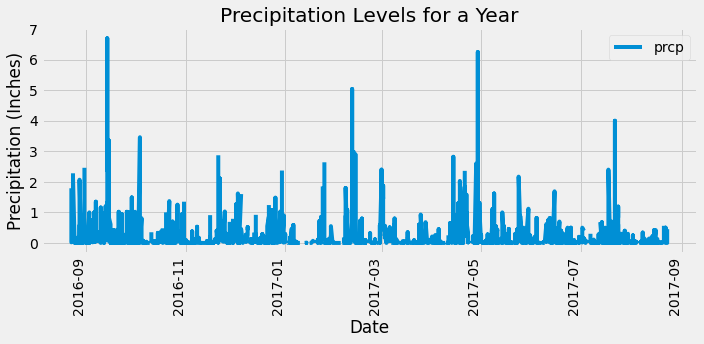

In [30]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(10,5))
plt.title("Precipitation Levels for a Year")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number stations in the dataset
stations=session.query(station).filter(station.id).count()
print(stations)

9


In [37]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest = session.query(func.min(measurement.tobs)).filter(measurement.station=='USC00519281').all()
highest=session.query(func.max(measurement.tobs)).filter(measurement.station=='USC00519281').all()
average=session.query(func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()
print(lowest)
print(highest)
print(average)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_yr_temp = session.query(measurement.date, measurement.tobs).filter(measurement.date >= "2016-08-23").\
    filter(measurement.station=='USC00519281').order_by(measurement.date).all()

station_df = pd.DataFrame(last_yr_temp, columns=['date','tobs'])
station_df

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


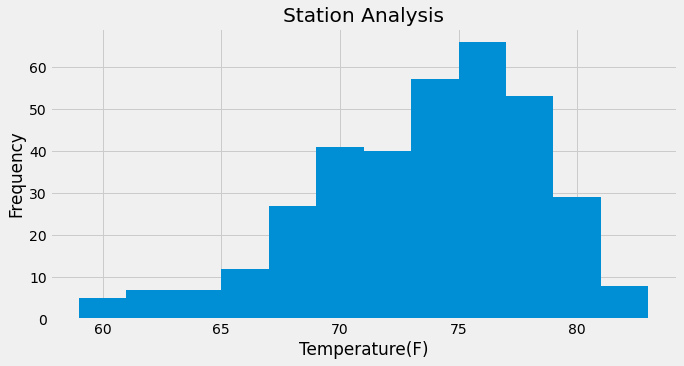

In [48]:
# plot the results as a histogram with bins=12
plt.figure(figsize=(10,5))
plt.hist(station_df['tobs'],bins=12)
plt.title("Station Analysis")
plt.xlabel("Temperature(F)")
plt.ylabel("Frequency")
plt.show()

# Close session

In [49]:
# Close Session
session.close()